Task 2: Feature Engineering and Descriptive Statistics

2.1 Feature Engineering

In [473]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt 


In [474]:
with open('../Data/clean_data.pkl', 'rb') as dataOutput:
    cleanedDF = pkl.load(dataOutput)
    
cleanedDF.head()
cleanedDF.info()


# We use pickle to save dataframes and import them for different tasks
# To make sure we have the correct dataframe, we print the head and info.

<class 'pandas.core.frame.DataFrame'>
Index: 10378 entries, 2888 to 18921
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10378 non-null  object 
 1   console       10378 non-null  object 
 2   genre         10378 non-null  object 
 3   publisher     10378 non-null  object 
 4   developer     10378 non-null  object 
 5   critic_score  10378 non-null  float64
 6   total_sales   10378 non-null  float64
 7   na_sales      10378 non-null  float64
 8   jp_sales      10378 non-null  float64
 9   pal_sales     10378 non-null  float64
 10  other_sales   10378 non-null  float64
 11  release_date  10378 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.0+ MB


In [475]:
# We have decided to bin our critics score into low 0-3, medium 4-7 and high 8-10

# Converting the datatype of critic_score to float
cleanedDF['critic_score'] = cleanedDF['critic_score'].astype(float)

cleanedDF['critic_score'] = pd.cut(cleanedDF['critic_score'], bins=[0, 3, 7, 10], labels=['low', 'medium', 'high'])


# Now lets check the distribution of the different bins
cleanedDF['critic_score'].value_counts()


critic_score
medium    5287
high      5091
low          0
Name: count, dtype: int64

In [476]:
# We also wanna bin the sales amounts with ranges, to make them more readable
# First we check the distribution of the sales

cleanedDF['total_sales'].describe()

count    10378.000000
mean         0.079177
std          0.088704
min          0.000000
25%          0.020000
50%          0.050000
75%          0.120000
max          0.570000
Name: total_sales, dtype: float64

In [477]:
# We have decided to bin our sales into low [0-0.02], medium [0.02-0.2] and high [0.2-1] with the sales being in the millions.
# The bins were mostly decided by the distribution of the total sales eg. 25%, 50%, 75% values.

cleanedDF['total_sales'] = pd.cut(cleanedDF['total_sales'], bins=[0, 0.02, 0.15, 1], labels=['low', 'medium', 'high'])

cleanedDF.value_counts('total_sales')

total_sales
medium    5068
low       2362
high      1705
Name: count, dtype: int64

In [478]:
# For onehot encoding we firstly need to check the amount of unique values in the columns we want to encode
print(cleanedDF['console'].unique().size)
print(cleanedDF['genre'].unique().size)
print(cleanedDF['publisher'].unique().size)
print(cleanedDF['title'].unique().size)



37
16
656
8217


In [479]:
# We have decided to onehot encode the genre of the games
cleanedDF = pd.get_dummies(cleanedDF, columns=['genre'])

print(cleanedDF.columns)   # We check the columns to see if the encoding was successful
print(cleanedDF.head())
# We can see that the different genres have been encoded into columns with true or false values

Index(['title', 'console', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'genre_Action', 'genre_Action-Adventure',
       'genre_Adventure', 'genre_Education', 'genre_Fighting', 'genre_MMO',
       'genre_Misc', 'genre_Music', 'genre_Platform', 'genre_Puzzle',
       'genre_Racing', 'genre_Role-Playing', 'genre_Shooter',
       'genre_Simulation', 'genre_Sports', 'genre_Strategy'],
      dtype='object')
                                title console        publisher  \
2888   Wreckless: ThE YaKuza MisSiOns      XB       Activision   
3045                Red Dead Revolver      XB   Rockstar Games   
3046     The Godfather (old US sales)      XB  Electronic Arts   
3102  Dance Dance Revolution Ultramix      XB           Konami   
3114                       SSX Tricky      GC    EA Sports BIG   

                                 developer critic_score total_sales  na_sales  \
2888                  

2.2 Descriptive Statistics

In [480]:
cleanedDF.describe()

# Here we have the mean, median and standard deviation of the different columns in the dataframe


,na_sales,jp_sales,pal_sales,other_sales
count,10378.000000,10378.000000,10378.000000,10378.000000
mean,0.052483,0.005563,0.015897,0.004705
std,0.072476,0.012066,0.024946,0.006764
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.020000,0.000000,0.000000,0.000000
75%,0.080000,0.000000,0.020000,0.010000
max,0.420000,0.050000,0.120000,0.020000


In [481]:
# Then we can count the frequency of the different categorial features.
# Firstly we have to check all the dtypes of the columns
cleanedDF.dtypes



title                       object
console                     object
publisher                   object
developer                   object
critic_score              category
total_sales               category
na_sales                   float64
jp_sales                   float64
pal_sales                  float64
other_sales                float64
release_date                object
genre_Action                  bool
genre_Action-Adventure        bool
genre_Adventure               bool
genre_Education               bool
genre_Fighting                bool
genre_MMO                     bool
genre_Misc                    bool
genre_Music                   bool
genre_Platform                bool
genre_Puzzle                  bool
genre_Racing                  bool
genre_Role-Playing            bool
genre_Shooter                 bool
genre_Simulation              bool
genre_Sports                  bool
genre_Strategy                bool
dtype: object

In [482]:
# We have to check the frequency of "title", "console", "publisher", "critic_score" and "total_sales"
print("\nTitle: ", cleanedDF['title'].value_counts())
print("\nConsole: ", cleanedDF['console'].value_counts())
print("\nPublisher: ", cleanedDF['publisher'].value_counts())
print("\nCritics score: ", cleanedDF['critic_score'].value_counts())
print("\nTotal sales: ", cleanedDF['total_sales'].value_counts())


Title:  title
Open Season                                               7
Handball 16                                               6
Rugby World Cup 2015                                      6
WRC 5: FIA World Rally Championship                       6
Ben 10 Galactic Racing                                    6
                                                         ..
Star Wars: The Force Unleashed - Ultimate Sith Edition    1
Spikeout: Battle Street                                   1
Train Simulator 2015                                      1
Iron Master: The Legendary Blacksmith                     1
SSX Tricky                                                1
Name: count, Length: 8217, dtype: int64

Console:  console
DS      1668
PC      1231
PS2      851
Wii      808
PSP      735
XB       626
X360     587
GBA      562
PS       500
PS4      458
PS3      438
PSV      401
GC       338
XOne     329
3DS      262
NS       182
N64      155
WiiU      74
2600      64
SNES      30
SAT   

The feature 'Title' has 8000+ unique values and is not useful for our analysis

Specificaly for our critics score bins, we can see that theres no games with a rating of "low" which is interesting 
which might be due to the cleaning of the data, and more specifically the removal of the outliers

We can see that the majority of games have a medium rating.

2.3 Visualization

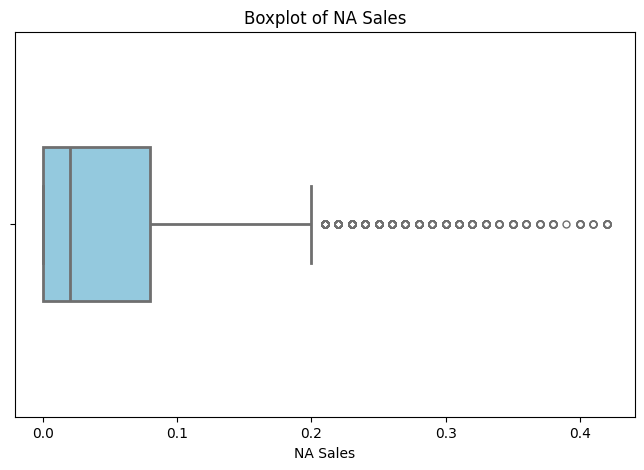

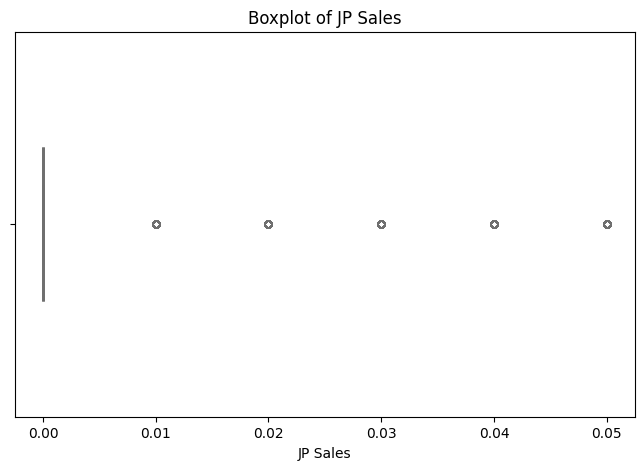

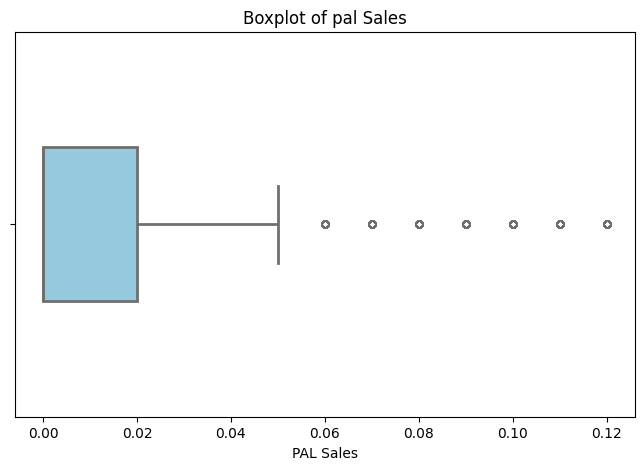

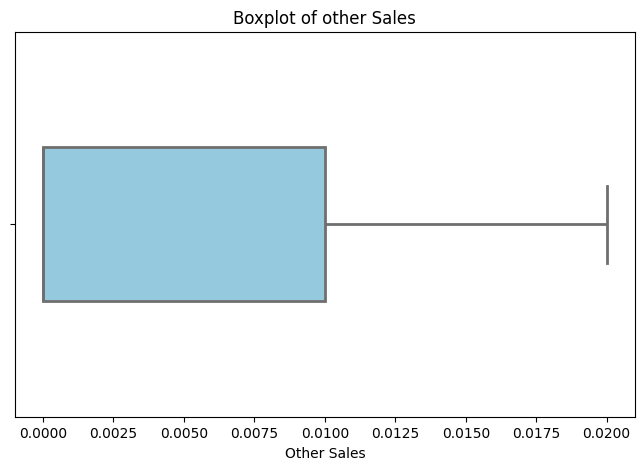

In [483]:
# Use seaborn to create box plots for numerical features to identify outliers
# We want to display the values of median, 25% and 75% quartiles and the outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=cleanedDF['na_sales'], color='skyblue', width=0.4, fliersize=5, linewidth=2)
plt.title('Boxplot of NA Sales')
plt.xlabel('NA Sales')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=cleanedDF['jp_sales'], color='skyblue', width=0.4, fliersize=5, linewidth=2)
plt.title('Boxplot of JP Sales')
plt.xlabel('JP Sales')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=cleanedDF['pal_sales'], color='skyblue', width=0.4, fliersize=5, linewidth=2)
plt.title('Boxplot of pal Sales')
plt.xlabel('PAL Sales')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=cleanedDF['other_sales'], color='skyblue', width=0.4, fliersize=5, linewidth=2)
plt.title('Boxplot of other Sales')
plt.xlabel('Other Sales')
plt.show()


When viewing the boxplots, you can tell that theres very few outliers, when we are talking about thousand of games.

We cleaned most of the outliers in task 1.

C:\Users\pelle\AppData\Local\Temp\ipykernel_9540\674845858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleanedDF['console'], palette='viridis')


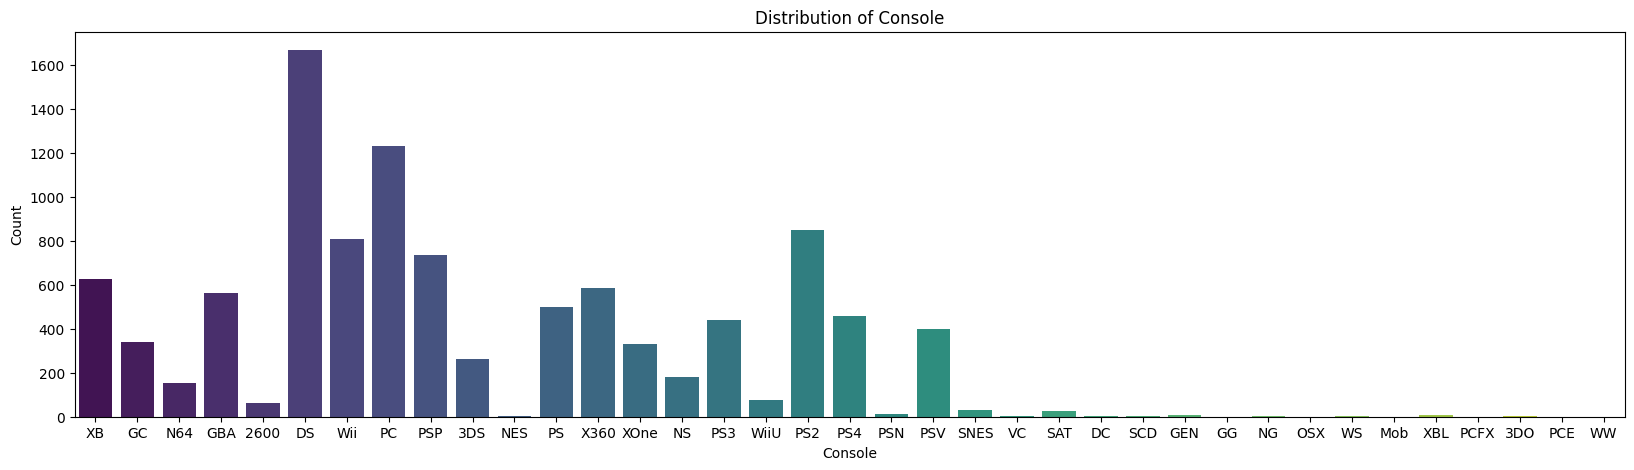

C:\Users\pelle\AppData\Local\Temp\ipykernel_9540\674845858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleanedDF['critic_score'], palette='viridis')


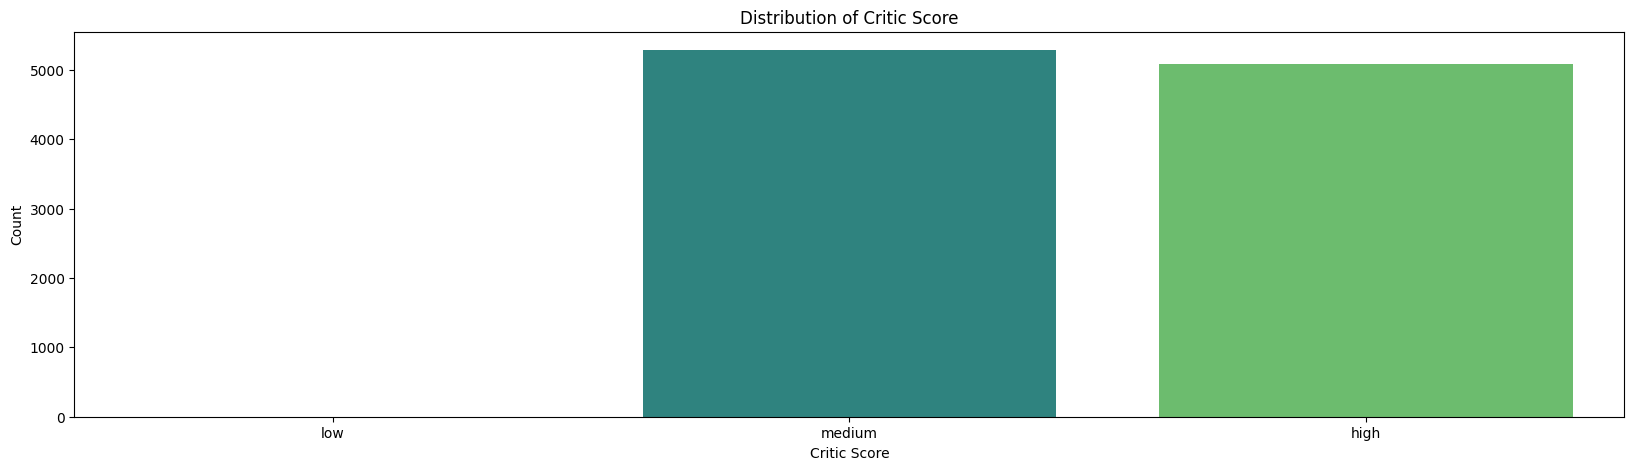

C:\Users\pelle\AppData\Local\Temp\ipykernel_9540\674845858.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleanedDF['total_sales'], palette='viridis')


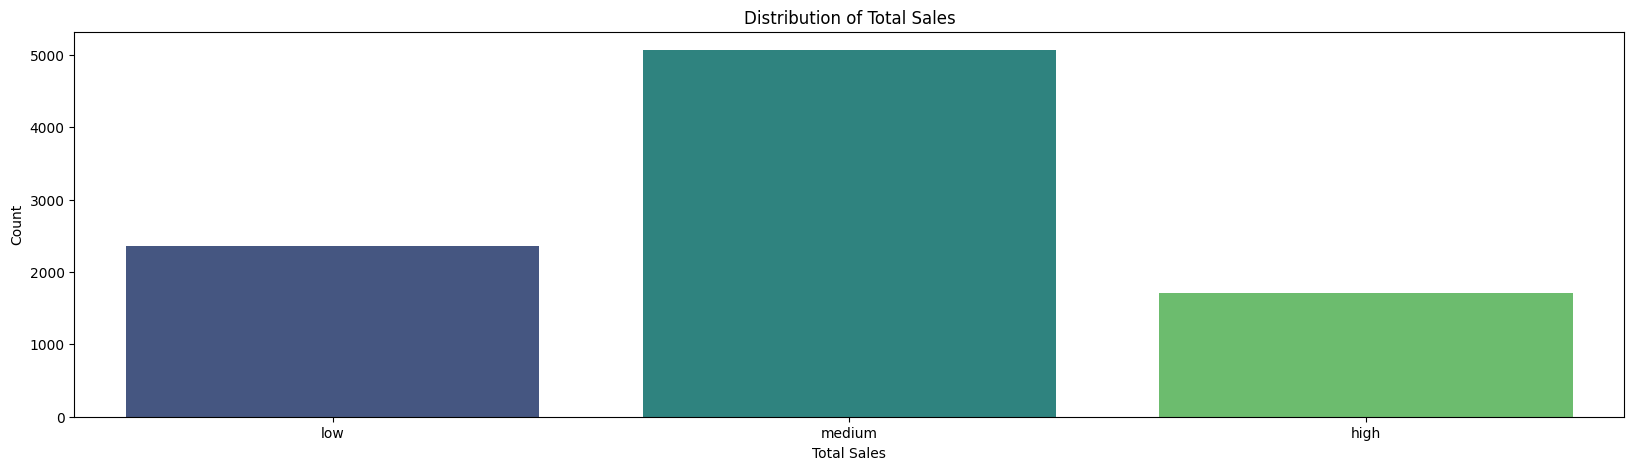

In [ ]:
# o Visualize the distribution of categorical features using bar plots.

plt.figure(figsize=(20, 5))
sns.countplot(x=cleanedDF['console'], palette='viridis')
plt.title('Distribution of Console')
plt.xlabel('Console')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(20, 5))
sns.countplot(x=cleanedDF['critic_score'], palette='viridis')
plt.title('Distribution of Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(20, 5))
sns.countplot(x=cleanedDF['total_sales'], palette='viridis')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Count')
plt.show()


